This is from Rachel, it's for the bayesim thing. IT HAS NOT BEEN USED SINCE THE FIRST WEEK.

# Kinematics Example
Start by importing all the code we'll need.

In [2]:
import numpy as np
import sys
import math
import pandas as pd
sys.path.append('../../')
import bayesim.model as bym
import bayesim.params as byp
import deepdish as dd
import matplotlib.pyplot as plt
#from jupyterthemes import jtplot
#jtplot.style('default')
np.random.seed(0)

First, we define our model function, in this case a simple parabolic trajectory for a projectile:
$$y(t) = v_0t-\frac12gt^2$$

In [3]:
def model_y(ec, params):
    """
    Simple model of a kinematic trajectory.
    Args:
        ec (`dict`): dictionary with a key 't' leading to a float value
        params (`dict`): dictionary with keys 'v0' and 'g' leading to float values
    Returns:
        float: y-value at the given time assuming the given parameters
    """
    # read in the inputs
    t = ec['t'] # experimental conditions
    v0 = params['v0']
    g = params['g']

    # compute and return
    return v0*t - 0.5 * g * t**2

Next, define the parameters to be fit.

In [4]:
pl = byp.Param_list()
pl.add_fit_param(name='v0', val_range=[0,20], units='m/s', display_name='$v_0$')
pl.add_fit_param(name='g', val_range=[0,20], units='m/s$^2$')
pl.add_ec(name='t', units='s', is_x=True) # plot this on the x-axis
pl.add_output(name='y', units='m')

Suppose we measure two data points: At time $t=2$, a height of $3.1\pm0.2$ m, and at time $t=2.3$, a height of $0.1\pm0.5 m$.

In [5]:
# the first two "observations"
data = pd.DataFrame()
data['t'] = [2, 2.3]
data['y'] = [3.1, 0.1]
data['uncertainty'] = [0.2, 0.5]
dd.io.save('two_points.h5', data)

We create the model object using our parameters and attach the observed data as well as the model function.

In [6]:
m = bym.Model(params=pl, obs_data_path='two_points.h5', model_data_func=model_y, calc_model_unc=True, keep_all=True)
m.run()

/Users/gracerojo/opt/anaconda3/envs/bpe/lib/python3.11/site-packages/bayesim/model.py:758: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ecpt = float(ec)
/Users/gracerojo/opt/anaconda3/envs/bpe/lib/python3.11/site-packages/bayesim/model.py:758: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ecpt = float(ec)


Used all the observed data! Last PMF to go into average may have been further from threshold condition.



AttributeError: module 'pandas' has no attribute 'Panel'

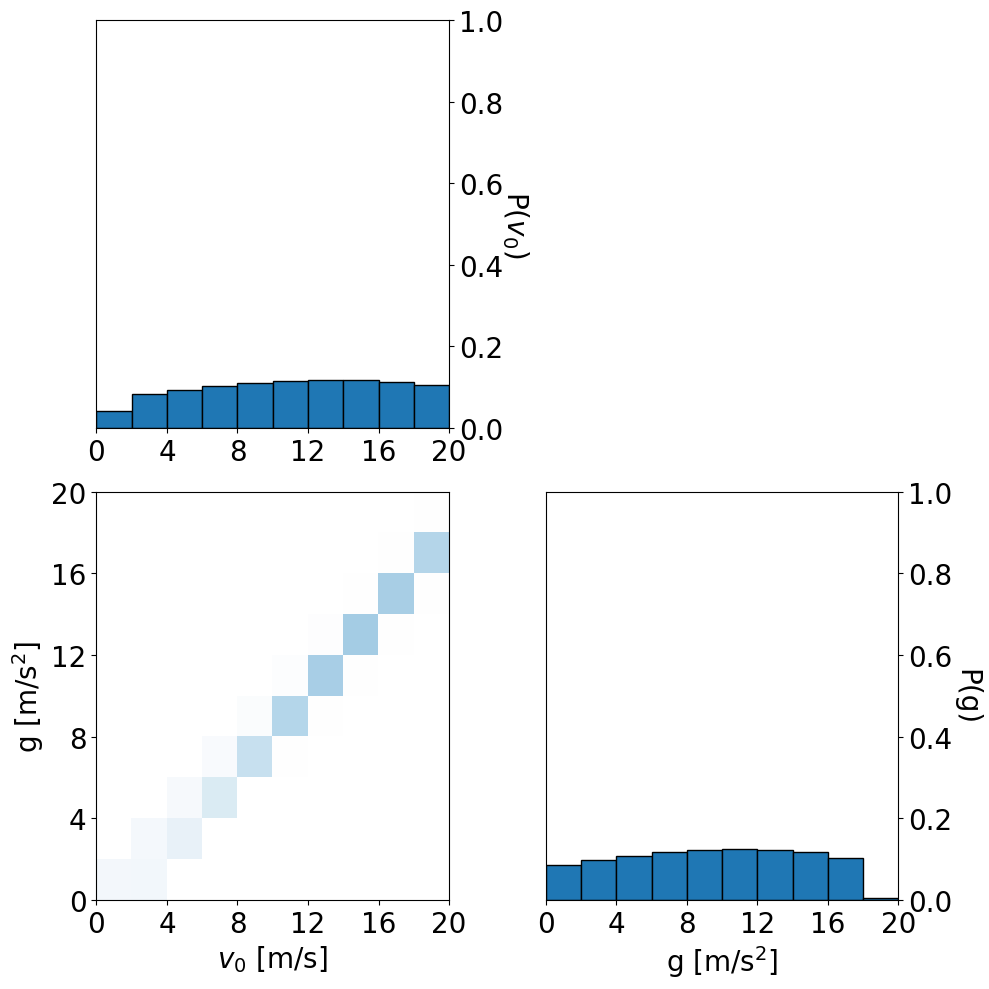

In [7]:
m.visualize_probs()

Suppose we generate a larger set of "noisy observations" over a broader range of times.

In [8]:
params = {'v0':11.31,'g':9.81}
data = pd.DataFrame()
t_vals = np.arange(0,3,0.1)
y_vals = [model_y({'t':t}, params)+0.3*np.random.randn() for t in t_vals]
data['t'] = t_vals
data['y'] = y_vals
dd.io.save('obs_data.h5',data)

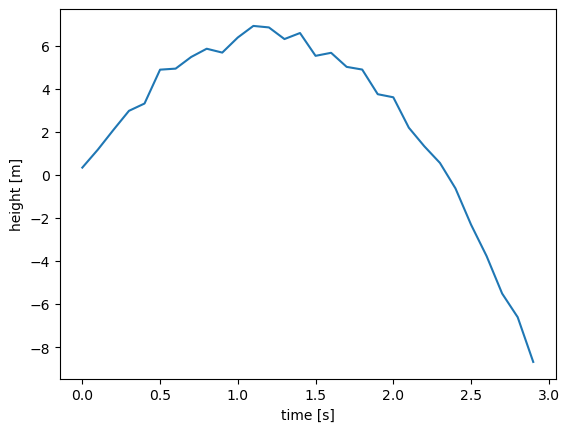

In [9]:
plt.plot(t_vals, y_vals)
plt.xlabel('time [s]')
plt.ylabel('height [m]')
plt.show()

In [10]:
# initialize bayesim model object again, now with more data (and assuming the larger uncertainty value for all the points)
m = bym.Model(params=pl, obs_data_path='obs_data.h5', model_data_func=model_y, calc_model_unc=True, fixed_unc=0.5, keep_all=True)

# run, using all data points
m.run(min_num_pts=len(m.obs_data))

done, points so far: 5


/Users/gracerojo/opt/anaconda3/envs/bpe/lib/python3.11/site-packages/bayesim/model.py:758: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ecpt = float(ec)
/Users/gracerojo/opt/anaconda3/envs/bpe/lib/python3.11/site-packages/bayesim/model.py:758: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ecpt = float(ec)
/Users/gracerojo/opt/anaconda3/envs/bpe/lib/python3.11/site-packages/bayesim/model.py:758: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ecpt = float(ec)
/Users/gracerojo/opt/anaconda3/envs/bpe/lib/python3.11/site-packages/bayesim/model.py:758: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ecpt 

AttributeError: module 'pandas' has no attribute 'Panel'

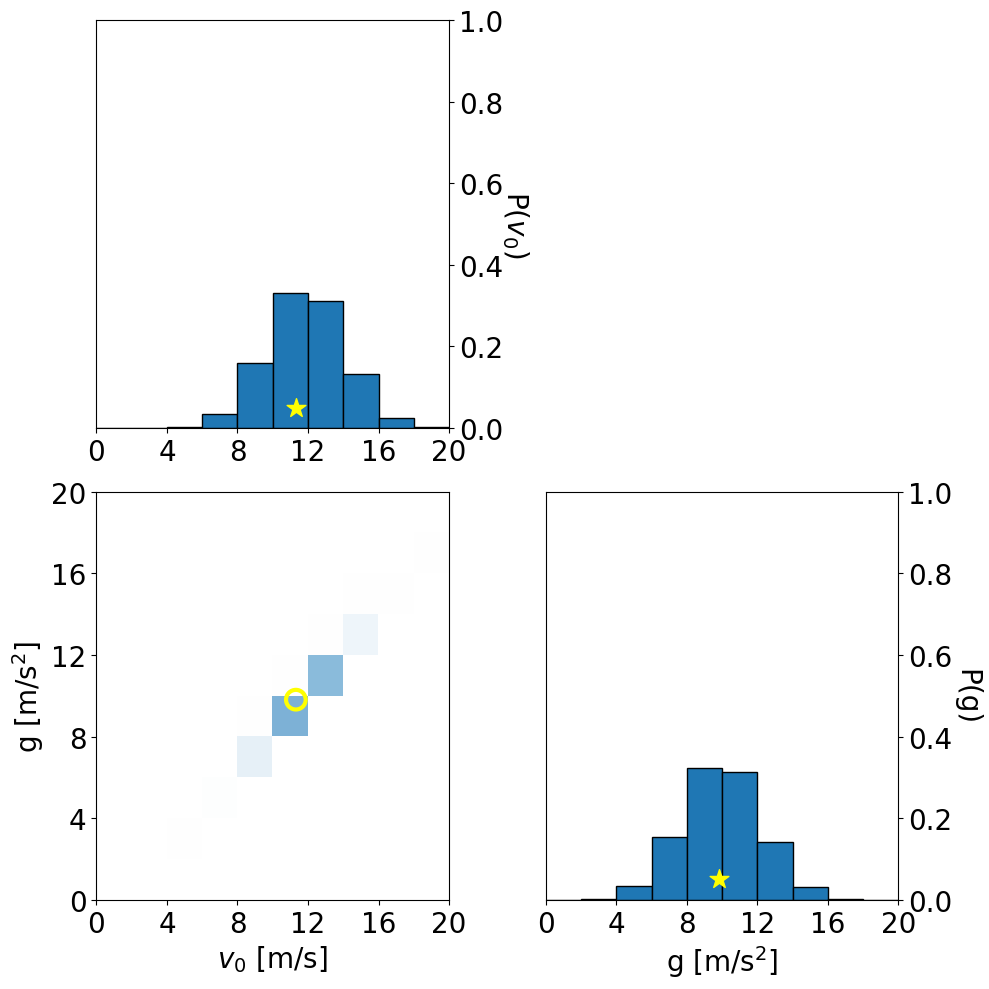

In [11]:
m.visualize_probs(true_vals=params)

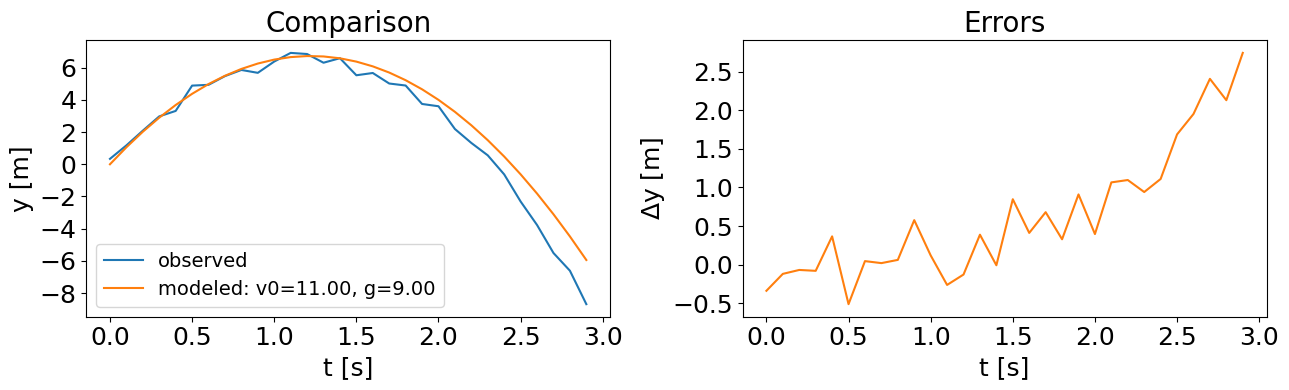

In [12]:
m.comparison_plot()

And now we subdivide the grid!

In [13]:
m.subdivide()

8 box(es) with probability > 0.01 and 15 neighboring boxes subdivided!


AttributeError: module 'pandas' has no attribute 'Panel'

In [14]:
m.attach_model(mode='function', model_data_func=model_y, calc_model_unc=True)

In [15]:
m.run(min_num_pts=len(m.obs_data))

/Users/gracerojo/opt/anaconda3/envs/bpe/lib/python3.11/site-packages/bayesim/model.py:758: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ecpt = float(ec)
/Users/gracerojo/opt/anaconda3/envs/bpe/lib/python3.11/site-packages/bayesim/model.py:758: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ecpt = float(ec)
/Users/gracerojo/opt/anaconda3/envs/bpe/lib/python3.11/site-packages/bayesim/model.py:758: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ecpt = float(ec)
/Users/gracerojo/opt/anaconda3/envs/bpe/lib/python3.11/site-packages/bayesim/model.py:758: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ecpt 

AttributeError: module 'pandas' has no attribute 'Panel'

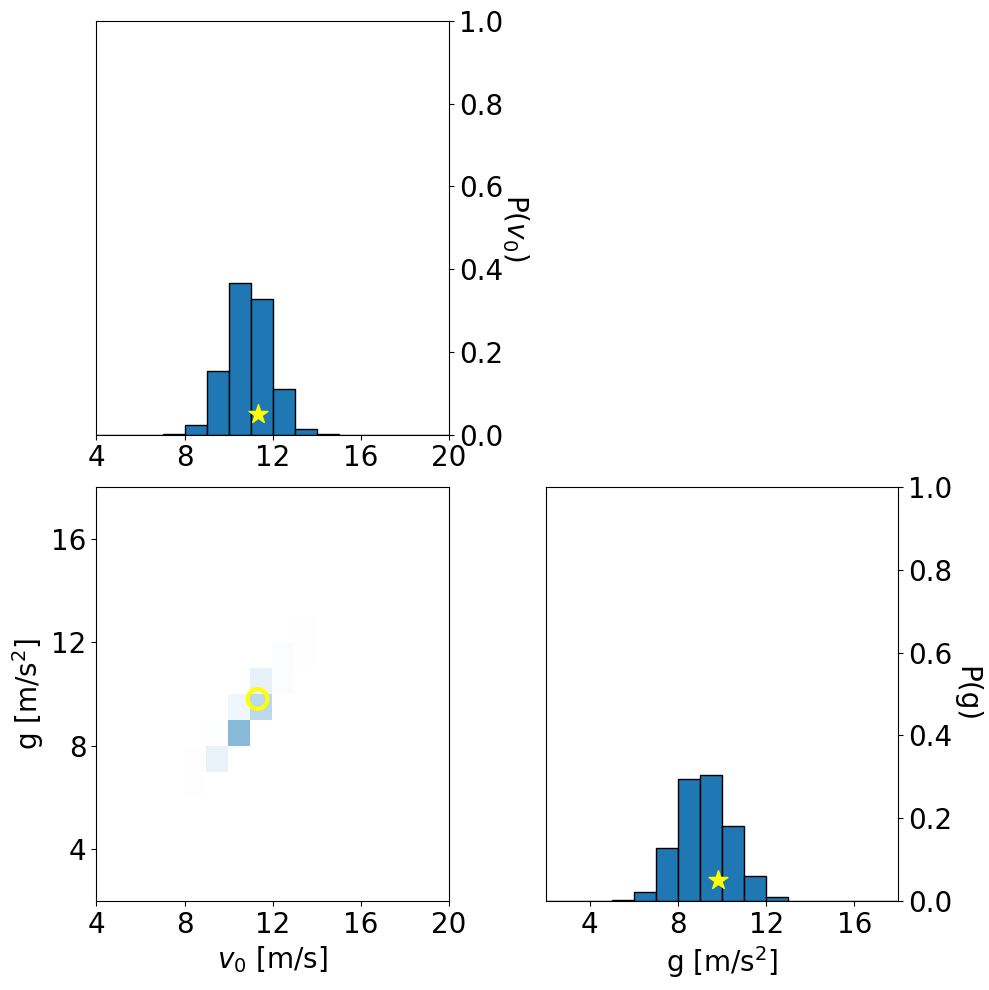

In [16]:
m.visualize_probs(true_vals=params)

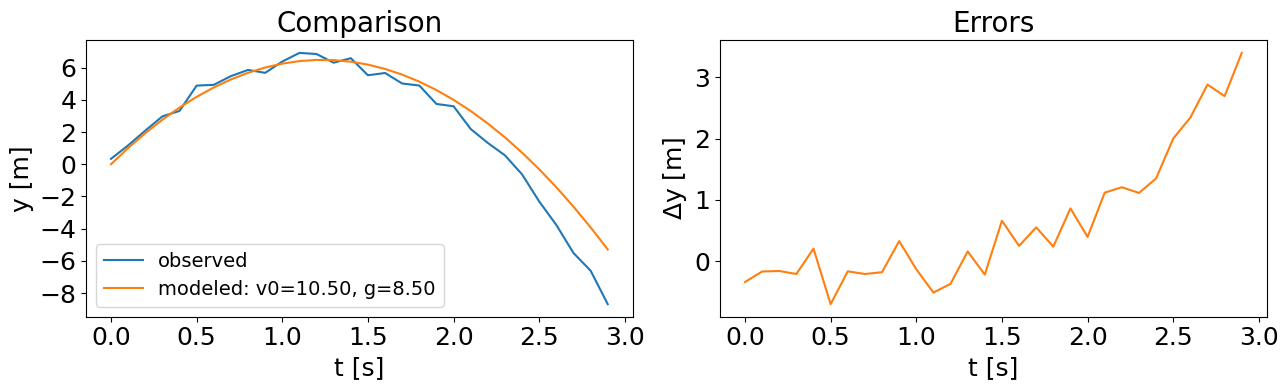

In [17]:
m.comparison_plot()

In [22]:
m.subdivide()
m.attach_model(mode='function', model_data_func=model_y, calc_model_unc=True)
m.run(min_num_pts=len(m.obs_data))
m.visualize_probs(true_vals=params)

80 box(es) with probability > 0.004310344827586207 and 52 neighboring boxes subdivided!


AttributeError: module 'pandas' has no attribute 'Panel'

KeyError: (10.56, 8.06)

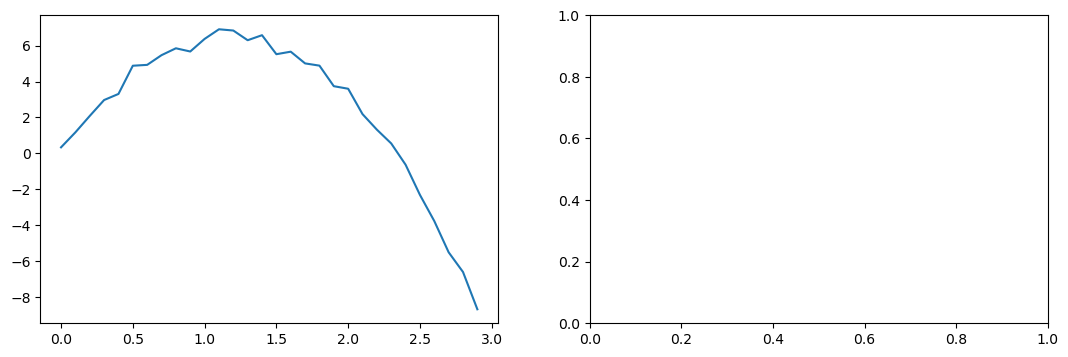

In [23]:
m.comparison_plot()

In [20]:
m.subdivide()
m.attach_model(mode='function', model_data_func=model_y, calc_model_unc=True)
m.run(min_num_pts=len(m.obs_data))
m.visualize_probs(true_vals=params)

28 box(es) with probability > 0.010869565217391304 and 30 neighboring boxes subdivided!


AttributeError: module 'pandas' has no attribute 'Panel'

KeyError: (10.12, 8.38)

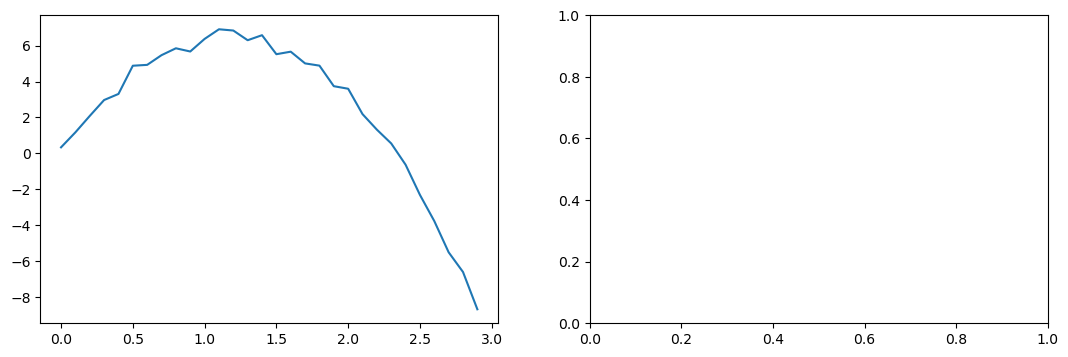

In [21]:
m.comparison_plot(num_param_pts=3)